Επεξεργασία αρχείου: harth\S006.csv
Επεξεργασία αρχείου: harth\S008.csv
Επεξεργασία αρχείου: harth\S009.csv
Επεξεργασία αρχείου: harth\S010.csv
Επεξεργασία αρχείου: harth\S012.csv
Επεξεργασία αρχείου: harth\S013.csv
Επεξεργασία αρχείου: harth\S014.csv
Επεξεργασία αρχείου: harth\S015.csv
Επεξεργασία αρχείου: harth\S016.csv
Επεξεργασία αρχείου: harth\S017.csv
Επεξεργασία αρχείου: harth\S018.csv
Επεξεργασία αρχείου: harth\S019.csv
Επεξεργασία αρχείου: harth\S020.csv
Επεξεργασία αρχείου: harth\S021.csv
Επεξεργασία αρχείου: harth\S022.csv
Επεξεργασία αρχείου: harth\S023.csv
Επεξεργασία αρχείου: harth\S024.csv
Επεξεργασία αρχείου: harth\S025.csv
Επεξεργασία αρχείου: harth\S026.csv
Επεξεργασία αρχείου: harth\S027.csv
Επεξεργασία αρχείου: harth\S028.csv
Επεξεργασία αρχείου: harth\S029.csv

K-means - Clusters: 2, Silhouette Score: 0.5413182604908673
K-means - Clusters: 3, Silhouette Score: 0.3664348416047517
K-means - Clusters: 4, Silhouette Score: 0.47845795052904716
K-means - Clusters: 5, Sil

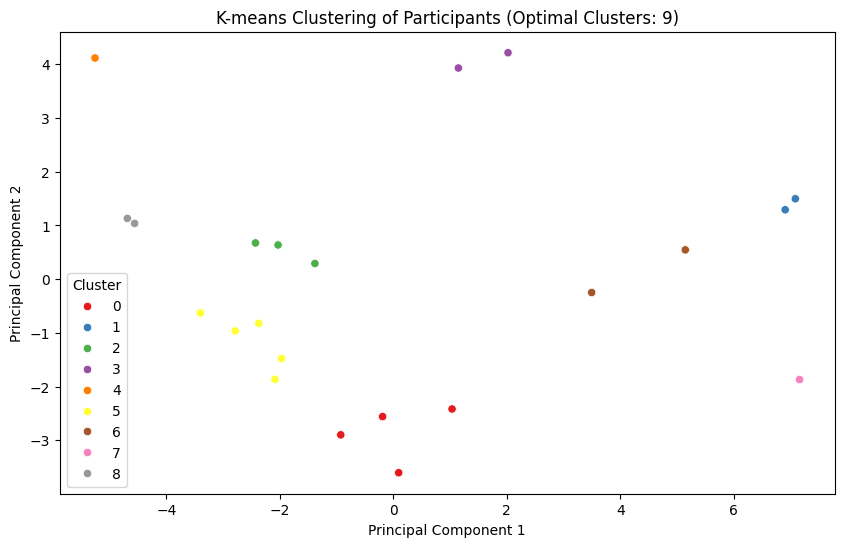

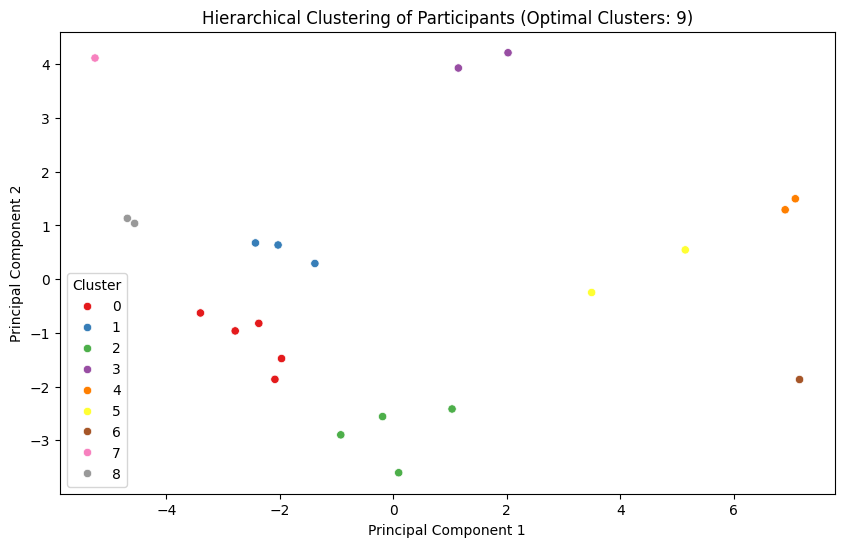

K-means Best Silhouette Score: 0.5644952704011358
Hierarchical Clustering Best Silhouette Score: 0.5644952704011358

Cluster 0:
Participants in this cluster:
['S006' 'S014' 'S015' 'S019' 'S021']

Cluster 8:
Participants in this cluster:
['S008' 'S012']

Cluster 1:
Participants in this cluster:
['S009' 'S013' 'S022']

Cluster 7:
Participants in this cluster:
['S010']

Cluster 2:
Participants in this cluster:
['S016' 'S017' 'S018' 'S020']

Cluster 5:
Participants in this cluster:
['S023' 'S025']

Cluster 6:
Participants in this cluster:
['S024']

Cluster 3:
Participants in this cluster:
['S026' 'S028']

Cluster 4:
Participants in this cluster:
['S027' 'S029']


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Φάκελος με αρχεία CSV
csv_folder = "harth"

# Λίστα με όλα τα αρχεία CSV στον φάκελο
csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# Συγκέντρωση όλων των δεδομένων σε ένα DataFrame
dataframes = []
for csv_file in csv_files:
    print(f"Επεξεργασία αρχείου: {csv_file}")
    df = pd.read_csv(csv_file)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["participant_id"] = os.path.basename(csv_file).split('.')[0]  # Δημιουργούμε μία στήλη με τα ονόματα των αρχείων csv χωρίς την κατάληξη .csv
    dataframes.append(df)

print("")

# Συνένωση όλων των DataFrames σε ένα
data = pd.concat(dataframes)

# Διαχωρισμός χαρακτηριστικών και στόχου
X = data.drop(["timestamp", "label"], axis=1, errors='ignore')
participant_ids = data["participant_id"]

# Προσθήκη του participant_id στο X
X["participant_id"] = participant_ids

# Αν υπάρχουν NaN τιμές, μπορούμε να τις συμπληρώσουμε
X = X.ffill().bfill()

# Εξάλειψη πιθανών NaN τιμών στα δεδομένα (ξανά για να είμαστε σίγουροι)
X = X.dropna()

# Ομαδοποίηση δεδομένων ανά συμμετέχοντα και δραστηριότητα με βάση την μέση τιμή, την τυπική απόκλιση, την μέγιστη και την ελάχιστη τιμή
grouped = X.groupby("participant_id").agg(['mean', 'std', 'max', 'min']).reset_index()

# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped.drop("participant_id", axis=1, level=0))

# PCA για τη μείωση της διάστασης των δεδομένων και την απεικόνιση
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Αρχικοποίηση clusters με βάση τον K-means
best_silhouette_kmeans = -1
best_clusters_kmeans = None
optimal_clusters = None

# Βρίσκουμε ποιό Silhouette Score είναι το καλύτερο για τον αλγόριθμο συσταδοποίησης K-Means 
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters_kmeans = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters_kmeans)
    print(f"K-means - Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
    if silhouette_avg > best_silhouette_kmeans:
        best_silhouette_kmeans = silhouette_avg
        best_clusters_kmeans = clusters_kmeans
        optimal_clusters = n_clusters

# Προσθήκη των clusters στο αρχικό DataFrame για τον K-means
grouped["cluster_kmeans"] = best_clusters_kmeans

# Αρχικοποίηση clusters με βάση το Hierarchical Clustering
best_silhouette_hierarchical = -1
best_clusters_hierarchical = None

# Βρίσκουμε ποιό Silhouette Score είναι το καλύτερο για τον αλγόριθμο συσταδοποίησης Agglomerative Clustering
for n_clusters in range(2, 11):
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    clusters_hierarchical = hierarchical_clustering.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters_hierarchical)
    print(f"Hierarchical Clustering - Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")
    if silhouette_avg > best_silhouette_hierarchical:
        best_silhouette_hierarchical = silhouette_avg
        best_clusters_hierarchical = clusters_hierarchical

# Προσθήκη των clusters στο αρχικό DataFrame για το Hierarchical Clustering
grouped["cluster_hierarchical"] = best_clusters_hierarchical

# Δημιουργία DataFrame για τα PCA δεδομένα
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])  # Χρησιμοποιούμε τις δύο πρώτες συνιστώσες

# Απεικόνιση των clusters για τον K-means
pca_df["cluster"] = best_clusters_kmeans
pca_df["participant_id"] = grouped["participant_id"].values

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set1")
plt.title(f"K-means Clustering of Participants (Optimal Clusters: {optimal_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Απεικόνιση των clusters για το Agglomerative Clustering
pca_df["cluster"] = best_clusters_hierarchical

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="cluster", palette="Set1")
plt.title(f"Hierarchical Clustering of Participants (Optimal Clusters: {optimal_clusters})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Υπολογισμός των μετρικών αξιολόγησης για τον K-means
silhouette_avg_kmeans = silhouette_score(X_pca, best_clusters_kmeans)
print(f"K-means Best Silhouette Score: {silhouette_avg_kmeans}")

# Υπολογισμός των μετρικών αξιολόγησης για το Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(X_pca, best_clusters_hierarchical)
print(f"Hierarchical Clustering Best Silhouette Score: {silhouette_avg_hierarchical}")

# Ανάλυση των clusters
for cluster in pca_df["cluster"].unique():
    print(f"\nCluster {cluster}:")
    participants_in_cluster = pca_df[pca_df["cluster"] == cluster]["participant_id"].unique()
    print("Participants in this cluster:")
    print(participants_in_cluster)



